In [ ]:
# @inproceedings{cakmak2021spatio,
#         author = {Cakmak, Eren and Plank, Manuel and Calovi, Daniel S. and Jordan, Alex and Keim, Daniel},
#         title = {Spatio-Temporal Clustering Benchmark for Collective Animal Behavior},
#         year = {2021},
#         isbn = {9781450391221},
#         publisher = {Association for Computing Machinery},
#         address = {New York, NY, USA},
#         url = {https://doi.org/10.1145/3486637.3489487},
#         doi = {10.1145/3486637.3489487},
#         booktitle = {Proceedings of the 1st ACM SIGSPATIAL International Workshop on Animal Movement Ecology and Human Mobility},
#         pages = {5–8},
#         numpages = {4},
#         location = {Beijing, China},
#         series = {HANIMOB '21}
# }

In [ ]:
# the code is based on the following: https://github.com/eren-ck/st_dbscan/blob/master/README.md

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from st_dbscan import ST_DBSCAN
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import Normalize
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

In [2]:
# import files
directory = r"C:\Users\ainii\OneDrive\Documents\TempSpa\locations\sortedfiles\ST-DBSCAN\event_time_list"

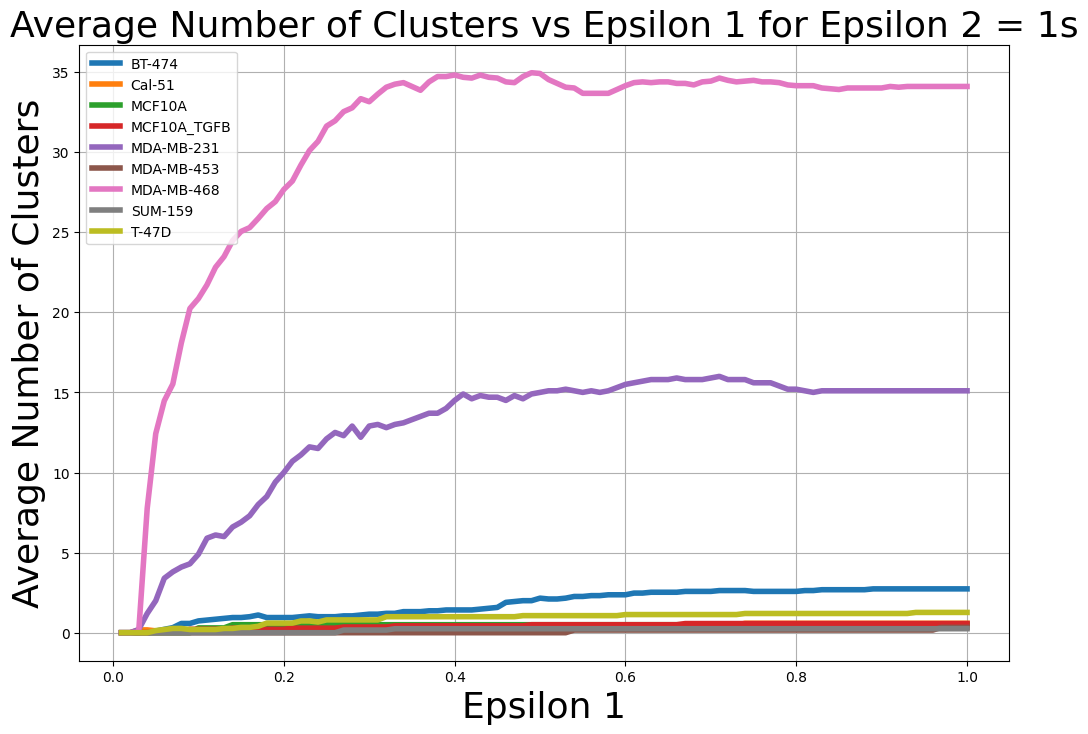

In [20]:
# Produce a graph to plot Average Cluster Number against Epsilon 1 Values between 0.01 and 1
plt.figure(figsize=(12, 8))

# Iterate over all files in folder (all cell types)
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)     
        cell_type = os.path.splitext(filename)[0] # Extract the cell type from the file name
        data = pd.read_csv(file_path)

        # Normalize cell_x and cell_y coordinates
        scaler = MinMaxScaler()
        data[['cell_x', 'cell_y']] = scaler.fit_transform(data[['cell_x', 'cell_y']])

        avg_num_clusters = []
        eps1_values = np.arange(0.01, 1.01, 0.01) # Initialise range of epsilon 1 values

        for eps1 in eps1_values:
            num_clusters_for_eps1 = []
            for slip_area in data['slip_area'].unique(): # Conduct ST-DBSCAN for each slip area
                subset = data[data['slip_area'] == slip_area]
                st_dbscan = ST_DBSCAN(eps1=eps1, eps2=1, min_samples=6) # Change epsilon values
                time_coord_values = subset[['Event_time', 'cell_x', 'cell_y']]
                st_dbscan.fit(time_coord_values)
                cluster_labels = st_dbscan.labels
                num_clusters_for_eps1.append(len(np.unique(cluster_labels[cluster_labels != -1])))

            avg_num_clusters_for_eps1 = np.mean(num_clusters_for_eps1)
            avg_num_clusters.append(avg_num_clusters_for_eps1)

        # Plot the values for each cell type on the same graph
        plt.plot(eps1_values, avg_num_clusters, label=cell_type, linewidth=4)

plt.title('Average Number of Clusters vs Epsilon 1 for Epsilon 2 = 1s', fontsize=26)
plt.xlabel('Epsilon 1', fontsize=26)
plt.ylabel('Average Number of Clusters', fontsize=26)
plt.legend(fontsize=26)
plt.grid(True)
plt.legend()
plt.show()

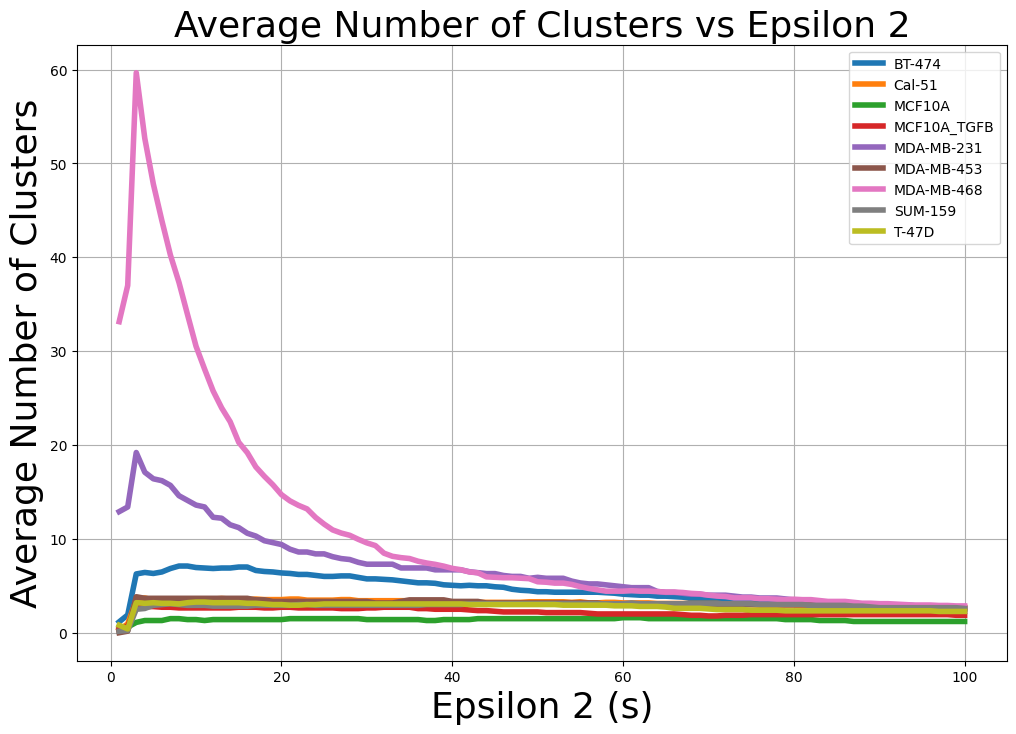

In [18]:
# Produce a graph to plot Average Cluster Number against Epsilon 2 Values between 1 and 100
plt.figure(figsize=(12, 8))

# Iterate over all files in folder (all cell types)
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        cell_type = os.path.splitext(filename)[0]  # Extract the cell type from the file name
        data = pd.read_csv(file_path)

        # Normalize cell_x and cell_y coordinates
        scaler = MinMaxScaler()
        data[['cell_x', 'cell_y']] = scaler.fit_transform(data[['cell_x', 'cell_y']])

        avg_num_clusters = []
        eps2_values = range(1, 101, 1) # Initialise range of epsilon 2 values

        for eps2 in eps2_values:
            num_clusters_for_eps2 = []

            for slip_area in data['slip_area'].unique(): # Conduct ST-DBSCAN for each slip area
                subset = data[data['slip_area'] == slip_area]
                st_dbscan = ST_DBSCAN(eps1=0.3, eps2=eps2, min_samples=6) # Change epsilon values
                time_coord_values = subset[['Event_time', 'cell_x', 'cell_y']]
                st_dbscan.fit(time_coord_values)
                cluster_labels = st_dbscan.labels
                num_clusters_for_eps2.append(len(np.unique(cluster_labels[cluster_labels != -1])))

            avg_num_clusters_for_eps2 = np.mean(num_clusters_for_eps2)
            avg_num_clusters.append(avg_num_clusters_for_eps2)

        # Plot the values for each cell type on the same graph
        plt.plot(eps2_values, avg_num_clusters, label=cell_type, linewidth=4)

plt.title('Average Number of Clusters vs Epsilon 2', fontsize=26)
plt.xlabel('Epsilon 2 (s)', fontsize=26)
plt.ylabel('Average Number of Clusters', fontsize=26)
plt.legend(fontsize=26)
plt.grid(True)
plt.legend()
plt.show()

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


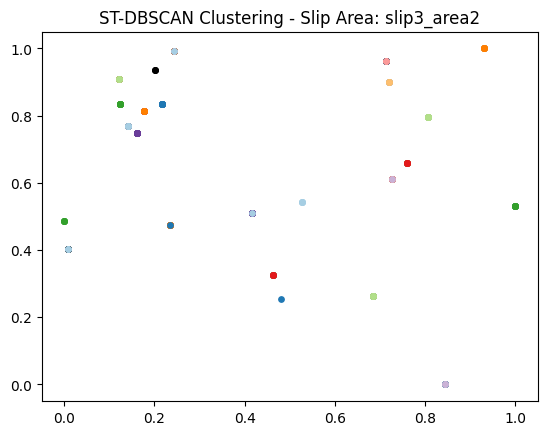

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


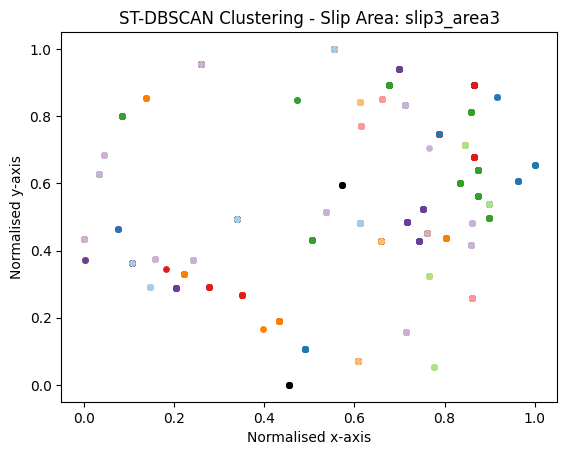

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


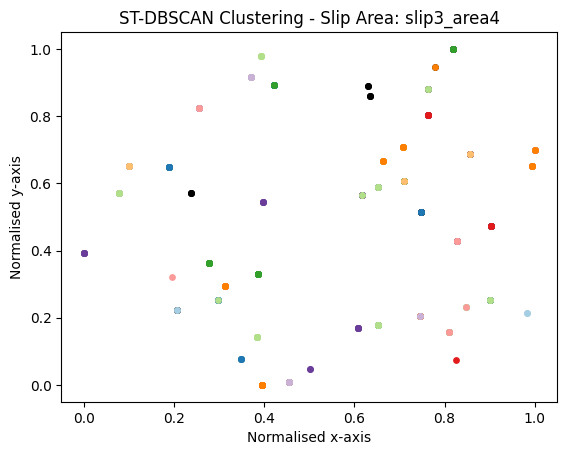

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


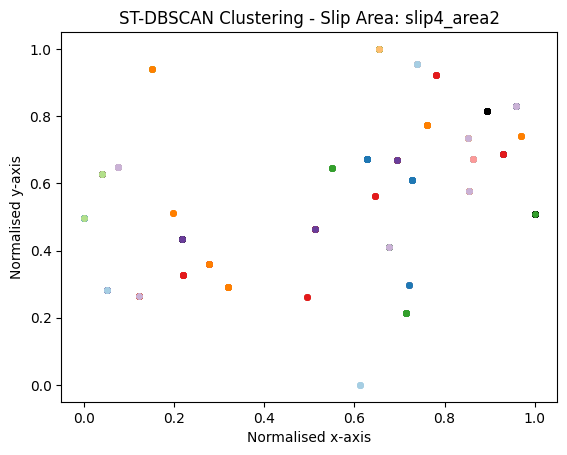

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


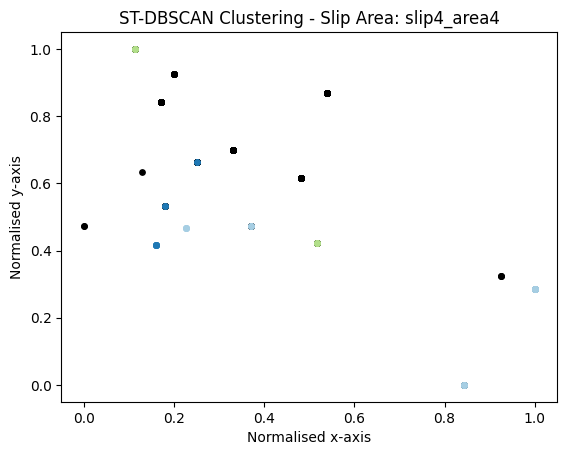

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


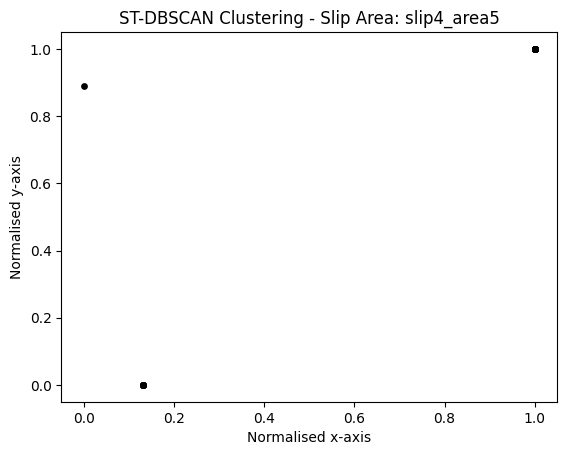

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


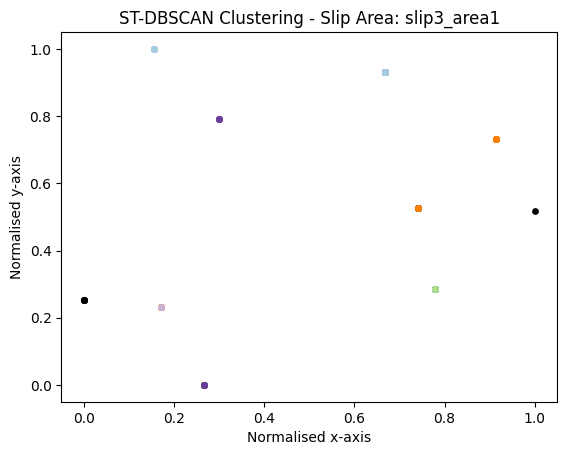

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


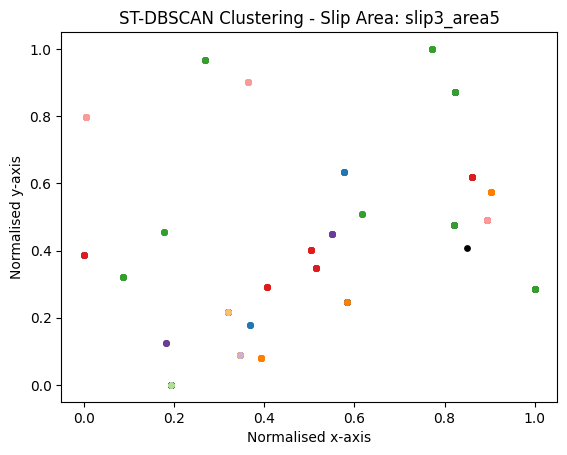

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


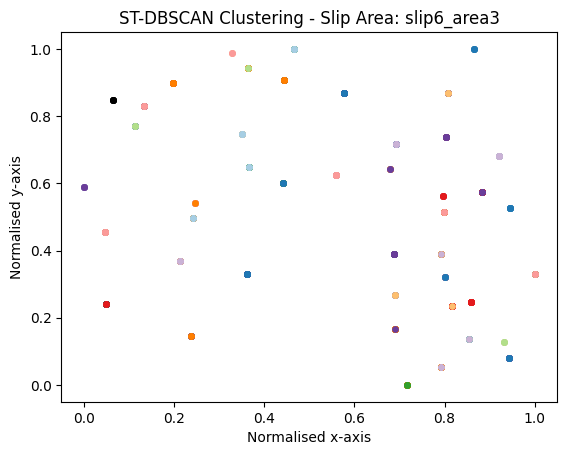

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


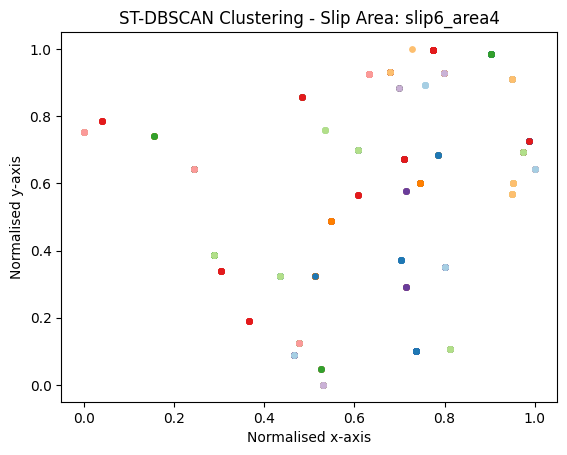

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


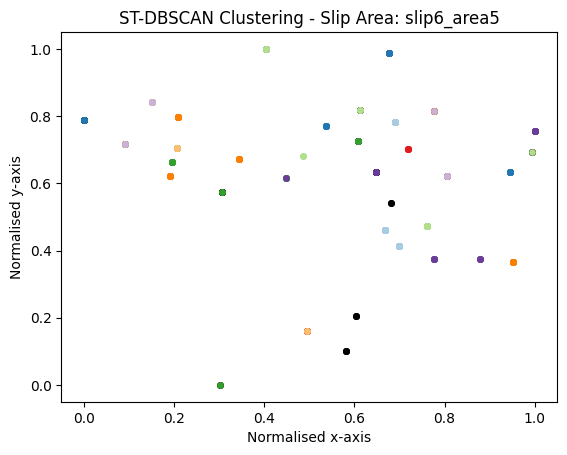

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


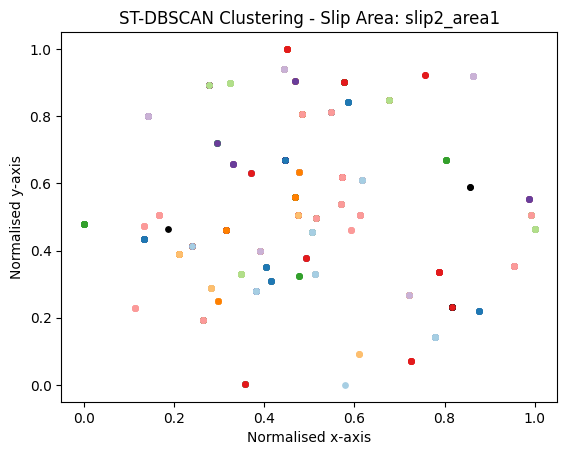

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


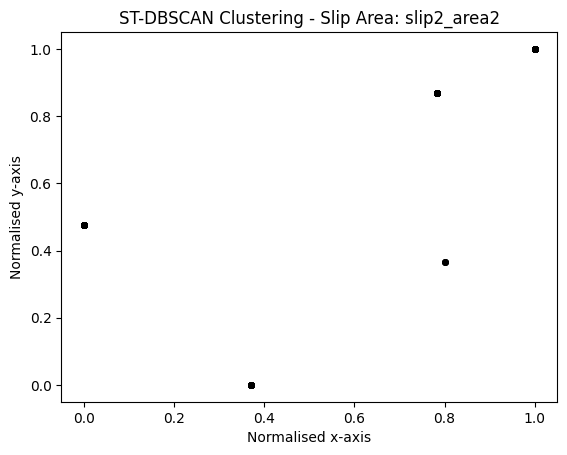

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


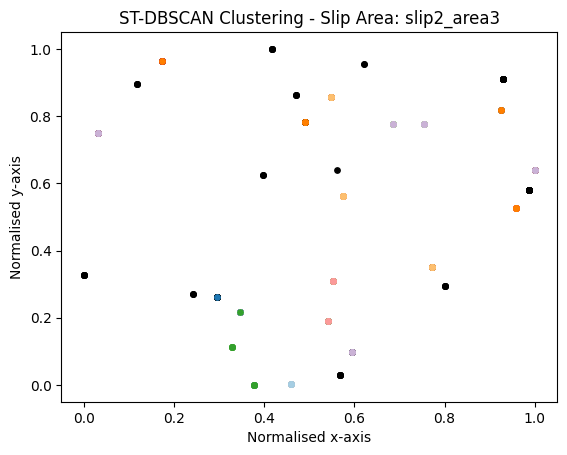

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


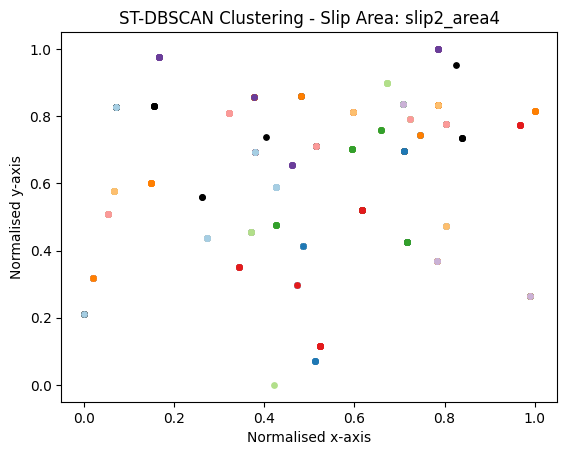

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


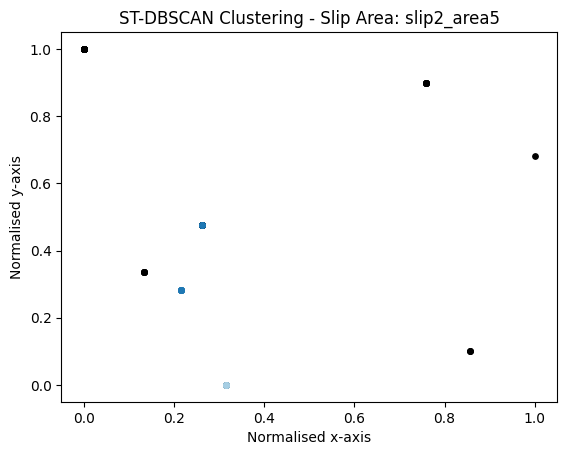

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


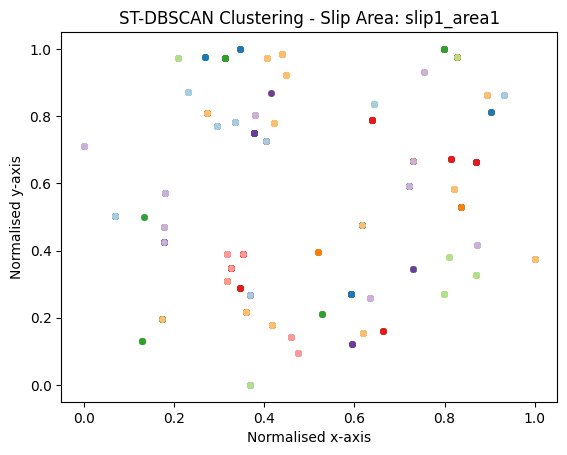

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


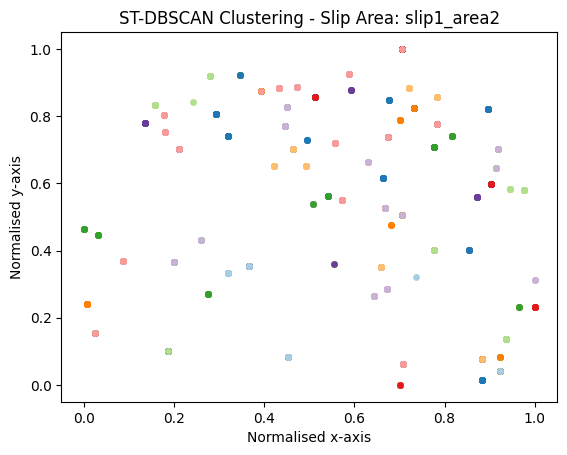

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


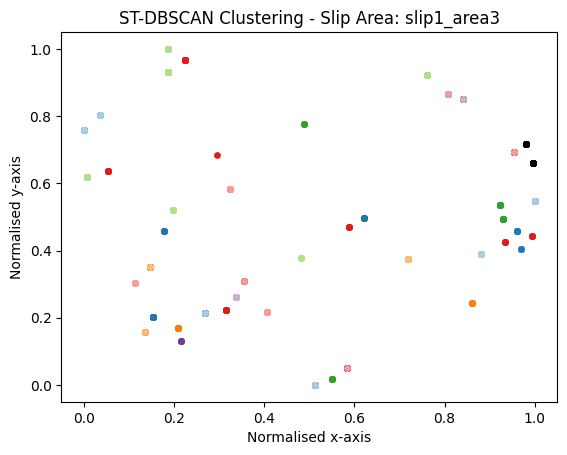

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


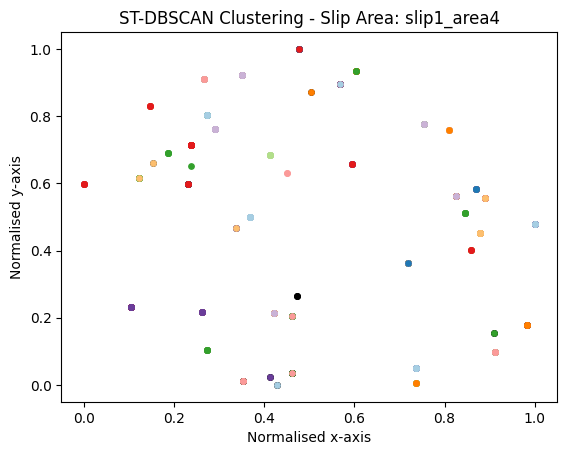

C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_92728\2425184084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


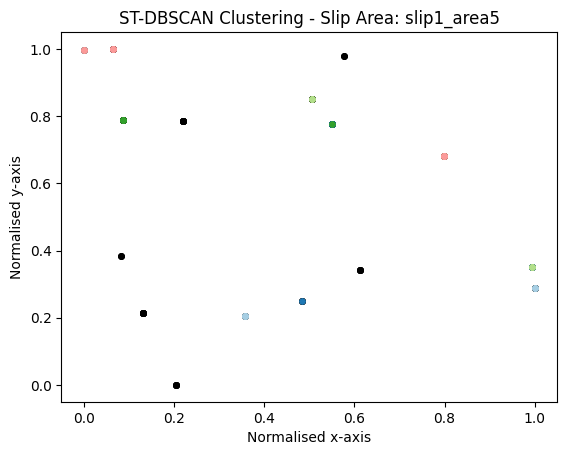

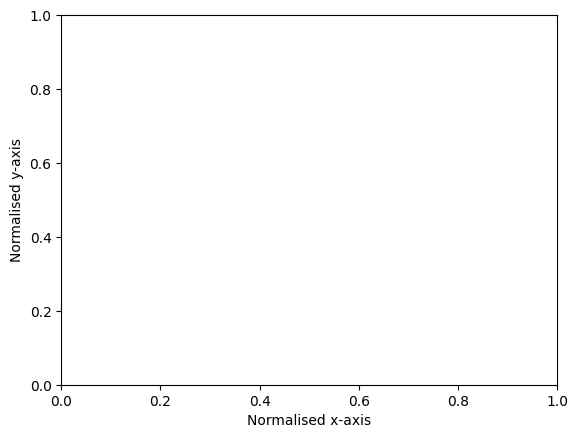

In [14]:
# Plot all cells displaying events and cluster
def plot(coord_values, labels):
    colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']

    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colours[i % len(colours)]

        clust = coord_values[labels == i]
        plt.scatter(clust.iloc[:, 0], clust.iloc[:, 1], c=[col], s=15)
    plt.show()

file_path = r"C:\Users\ainii\OneDrive\Documents\TempSpa\locations\sortedfiles\ST-DBSCAN\event_time_list\MDA-MB-468.csv"
data = pd.read_csv(file_path)
slip_areas = data['slip_area'].unique()

# Conduct ST-DBSCAN for each slip area
for slip_area in slip_areas:
    subset = data[data['slip_area'] == slip_area]
    
    # Normalize X and Y coordinates
    subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
    subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())

    st_dbscan = ST_DBSCAN(eps1=0.9, eps2=1, min_samples=6) 
    # eps1 = distance radius, eps2 = time radius, min_samples = min number of points for a core point
    # to calculate optimum min_sample, use 2*dimensions(D), hence for three dimensions, use 6
    coord_values = subset[['Event_time', 'cell_x', 'cell_y']]
    st_dbscan.fit(coord_values)
    cluster_labels = st_dbscan.labels

    # Plot on graph
    plt.title(f"ST-DBSCAN Clustering - Slip Area: {slip_area}") 
    plot(coord_values.iloc[:, 1:], cluster_labels)
    plt.xlabel('Normalised x-axis')
    plt.ylabel('Normalised y-axis')